# Lab assignment 4: CNNs and Autoencoders

In this assignment we will first train a CNN for the classification problem and then an encoder that learns representations of images of the `fashion_mnist` dataset.

### Dataset `Fashion MNIST`

This examples uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images split into 10 categories. Each image contains one peace of clothing or footwear. 
Resolution of each image is $28 \times 28$ pixels.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Image 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST examples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a replacement for the traditional [MNIST](http://yann.lecun.com/exdb/mnist/) dataset that was previously often used as the first illustrative data set for classification (with images). `MNIST` contains images of handwritten numbers in a very similar format as previously described for `Fashion MNIST`.

Fashion `MNIST` is a somewhat heavier set of data compared to `MNIST`, but both sets are extremely clean (no noise, deviations in the corners of the photo, relatively similar lighting), and solving the classification problem on them is not difficult.

In this example, we will use $60000$ images to train the network, and the other $10000$ images to evaluate how accurately our network has classified the images.

Since `Fashion MNIST` is a relatively well-known set that is often used, it is not uncommon for libraries to provide auxiliary functions for its download and use.

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

a) Using the `load_data` function from the `fashion_mnist` package, load images for the training set and the test set. Print the names of the available classes.

In [3]:
# Load the train_original and test data
((x_data, y_data),(x_test, y_test)) = fashion_mnist.load_data()

In [4]:
# Print the shape of your data
x_data.shape
y_data.shape
x_test.shape
x_test.shape

(10000, 28, 28)

In [5]:
# Class_names
label_dict = {
0:	"T-shirt/top", 
1:	"Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7:	"Sneaker",
8:	"Bag",
9:	"Ankle boot"
}

class_names = [val for val in label_dict.values()]
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


b) Select the first $30000$ images from the loaded set for training, and then the next $10000$ for validation.

In [6]:
# Training data
x_train = x_data[:30000]
y_train = y_data[:30000]

In [7]:
# Shape of the train data
print(x_train.shape)
print(y_train.shape)

(30000, 28, 28)
(30000,)


In [8]:
# Check the number of categories in the training dataset

num_classes = len(np.unique(y_train))
print(num_classes)

10


In [9]:
# Validation data
x_val = x_data[30000:40000]
y_val = y_data[30000:40000]

In [10]:
# Shape of the validation data
print(x_val.shape)
print(y_val.shape)

(10000, 28, 28)
(10000,)


In [11]:
# Check the number of categories in the validation dataset
print(len(np.unique(y_val)))

10


In [12]:
# Check the shape of the test set
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


c) Transform the loaded images into `float32` type, and then normalize them. As it is necessary to transform labels (arrays of numbers) into a form that is suitable for calculating the error (categorical cross entropy), use an auxiliary function `keras.utils.to_categorical` to do so.

In [13]:
# Prepare the data
# Transform to float
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# Normalize 
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [14]:
# Prepare the labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Part 1: CNN

(d) Create a fully connected neural network with the following properties:

- Since the input is an image of the form $(28,28)$, it is necessary to transform it into a shape that a fully connected network can accept. At the beginning, add a layer that does exactly such a transformation.

- Next, define a fully connected layer with $128$  neurons and `ReLu` activation function. 

- Finally, define the next fully connected layer with  $10$  neurons and `softmax` activation function.

In [15]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

(e) Train the previously defined network in $10$ epochs with the batch size equal to $32$. For the error, use categorical cross entropy, other parameters you may choose arbitrarily. Create a textual summary of your model.

In [16]:
# Compile the model
epochs = 10
batch_size = 32
num_classes = 10


model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
# Textual summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Train the model
history = model.fit(x_train, y_train, epochs=epochs,
                    batch_size=batch_size,  validation_data=(x_val, y_val))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5728 - accuracy: 0.7999 - val_loss: 0.4582 - val_accuracy: 0.8423
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4186 - accuracy: 0.8513 - val_loss: 0.4525 - val_accuracy: 0.8388
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3746 - accuracy: 0.8643 - val_loss: 0.3857 - val_accuracy: 0.8641
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3436 - accuracy: 0.8727 - val_loss: 0.3541 - val_accuracy: 0.8720
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3230 - accuracy: 0.8807 - val_loss: 0.3706 - val_accuracy: 0.8668
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3039 - accuracy: 0.8874 - val_loss: 0.3472 - val_accuracy: 0.8767
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2882 - accuracy: 0.8929 - val_loss: 0.3520 - val_accuracy: 0.8743
Epoch 

(f) Plot accuracy on the training and validation datasets over training epochs. Add a legend.

Text(0.5, 1.0, 'Training and Validation Accuracy')

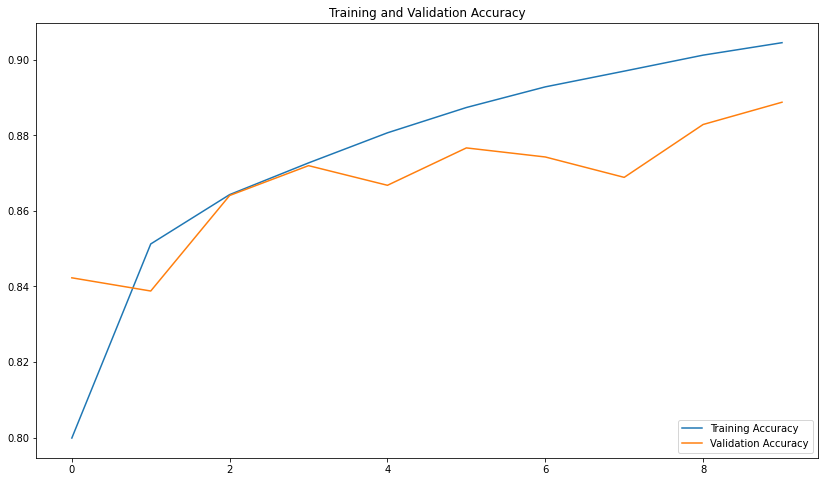

In [19]:
# Plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

## Part 2: Autoencoder

(g) Create an autoencoder network with the following properties:
- the encoder consists of a first layer that corrects the loaded image (transforms it into the right shape) and one dense layer of latent dimension $64$ with the `ReLu` activation function,
- the decoder consists of a dense layer of dimension $784$ with `sigmoid` activation function and a layer that transforms the image to the initial dimension. 

Use the `adam` optimizer and `mse` error as a loss function.

In [20]:
# Latent dimension
latent_dim = 64

In [21]:
# encoder_decoder model definition (sequential)
encoder_decoder = Sequential()
encoder_decoder.add(layers.Flatten(input_shape=(28, 28)))
encoder_decoder.add(layers.Dense(64, activation='relu'))
encoder_decoder.add(layers.Dense(784, activation='sigmoid'))
encoder_decoder.add(layers.Reshape((28, 28)))


In [22]:
# Compile the model
encoder_decoder.compile(optimizer='adam',
              loss=tf.keras.losses.mse)

In [23]:
encoder_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


(h) Train the network in $10$ epochs. Set the `shuffle` parameter to True. Set the `batch_size` to $32$.

In [24]:
# Train
epochs = 10
batch_size = 32
num_classes = 10

history = encoder_decoder.fit(x_train, x_train, epochs=epochs,
                    batch_size=batch_size,  validation_data=(x_val, x_val), shuffle = True)


Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0322 - val_loss: 0.0183
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0153 - val_loss: 0.0133
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0094 - val_loss: 0.0098
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0092 - val_loss: 0.0092

(i) Plot loss on the training and validation datasets over training epochs. Add a legend.

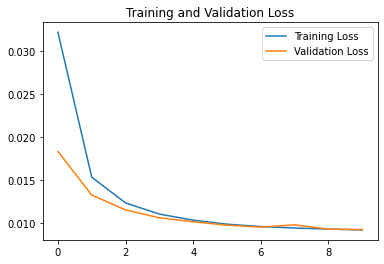

In [25]:
# Plot
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(j) Show for an arbitrary image of the test set how the autoencoder works. In other words, plot an arbitrary original and  predicted image from the test set.

In [26]:
# Predictions
x_decoded = encoder_decoder.predict(x_test)

In [31]:
# Arbitrary image chosen for prediction
pred_image = x_decoded[0]
image = x_test[0]

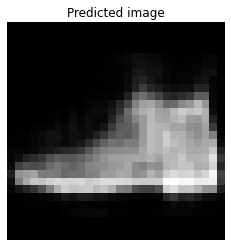

In [34]:
# Plot the prediction
pred_image = (pred_image * 255).astype(np.uint8)
plt.title('Predicted image')
plt.axis('off')
plt.imshow(pred_image, interpolation='none', cmap='gray')

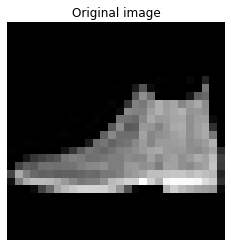

In [35]:
# Plot the original image
image = (image * 255).astype(np.uint8)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, interpolation='none', cmap='gray')

(k) Calculate the `mse` error for the autoencoder on the test set. You can use the `evaluate` function.

In [42]:
# MSE error
encoder_decoder.evaluate(x_decoded, x_test, batch_size=batch_size)

313/313 [==============================] - 0s 1ms/step - loss: 0.0122


0.012223501689732075